# 4 - More on Decorators

## Real-world examples
1. Timer
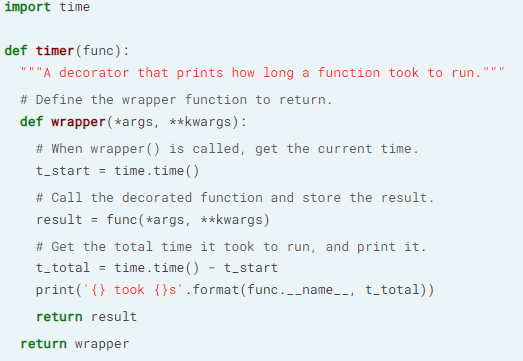

2. memoize: fast lookup table for a funciton
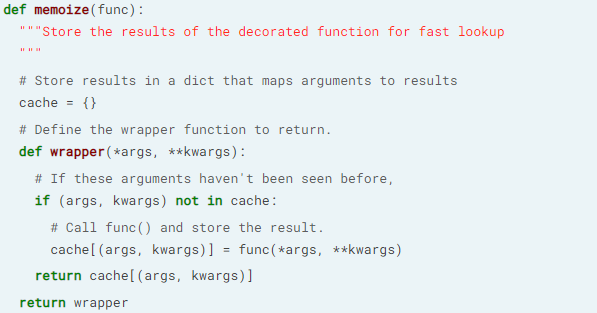

Whent to use
- add common behaviour to many function

### Print the return type
You are debugging a package that you've been working on with your friends. Something weird is happening with the data being returned from one of your functions, but you're not even sure which function is causing the trouble. You know that sometimes bugs can sneak into your code when you are expecting a function to return one thing, and it returns something different. For instance, if you expect a function to return a numpy array, but it returns a list, you can get unexpected behavior. To ensure this is not what is causing the trouble, you decide to write a decorator, print_return_type(), that will print out the type of the variable that gets returned from every call of any function it is decorating.

In [1]:
def print_return_type(func):
  # Define wrapper(), the decorated function
  def wrapper(*args, **kwargs):
    # Call the function being decorated
    result = func(*args, **kwargs)
    print('{}() returned type {}'.format(
      func.__name__, type(result)
    ))
    return result
  # Return the decorated function
  return wrapper
  
@print_return_type
def foo(value):
  return value
  
print(foo(42))
print(foo([1, 2, 3]))
print(foo({'a': 42}))

foo() returned type <class 'int'>
42
foo() returned type <class 'list'>
[1, 2, 3]
foo() returned type <class 'dict'>
{'a': 42}


### Counter
You're working on a new web app, and you are curious about how many times each of the functions in it gets called. So you decide to write a decorator that adds a counter to each function that you decorate. You could use this information in the future to determine whether there are sections of code that you could remove because they are no longer being used by the app.

In [2]:
def counter(func):
  def wrapper(*args, **kwargs):
    wrapper.count += 1
    # Call the function being decorated and return the result
    func(*args, **kwargs)
    return wrapper.count
  wrapper.count = 0
  # Return the new decorated function
  return wrapper

# Decorate foo() with the counter() decorator
@counter
def foo():
  print('calling foo()')
  
foo()
foo()

print('foo() was called {} times.'.format(foo.count))

calling foo()
calling foo()
foo() was called 2 times.


## Decorators and metadata
### Problems with Decorators
- wrapper don't have docstring 
- functools wraps can be help
- original_funciton__wrapped__ can give us original funciton

### Preserving docstrings when decorating functions
Your friend has come to you with a problem. They've written some nifty decorators and added them to the functions in the open-source library they've been working on. However, they were running some tests and discovered that all of the docstrings have mysteriously disappeared from their decorated functions. Show your friend how to preserve docstrings and other metadata when writing decorators.

In [3]:
def add_hello(func):
  def wrapper(*args, **kwargs):
    print('Hello')
    return func(*args, **kwargs)
  return wrapper

# Decorate print_sum() with the add_hello() decorator
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

Hello
30
None


In [4]:
# To show your friend that they are printing the wrapper() function's docstring, not the print_sum()
# docstring, add the following docstring to wrapper():
def add_hello(func):
  # Add a docstring to wrapper
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""

    print('Hello')
    return func(*args, **kwargs)
  return wrapper

@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

Hello
30
Print 'hello' and then call the decorated function.


In [5]:
# Import the function you need to fix the problem
from functools import wraps

def add_hello(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    """Print 'hello' and then call the decorated function."""
    print('Hello')
    return func(*args, **kwargs)
  return wrapper
  
@add_hello
def print_sum(a, b):
  """Adds two numbers and prints the sum"""
  print(a + b)
  
print_sum(10, 20)
print(print_sum.__doc__)

Hello
30
Adds two numbers and prints the sum


### Measuring decorator overhead
Your boss wrote a decorator called check_everything() that they think is amazing, and they are insisting you use it on your function. However, you've noticed that when you use it to decorate your functions, it makes them run much slower. You need to convince your boss that the decorator is adding too much processing time to your function. To do this, you are going to measure how long the decorated function takes to run and compare it to how long the undecorated function would have taken to run. This is the decorator in question:
```python
def check_everything(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    check_inputs(*args, **kwargs)
    result = func(*args, **kwargs)
    check_outputs(result)
    return result
  return wrapper
```

**call function without decorator**

`duplicated_list = duplicate.__wrapped__(list(range(50)))`

In [6]:
@check_everything
def duplicate(my_list):
  """Return a new list that repeats the input twice"""
  return my_list + my_list

t_start = time.time()
duplicated_list = duplicate(list(range(50)))
t_end = time.time()
decorated_time = t_end - t_start

t_start = time.time()
# Call the original function instead of the decorated one
duplicated_list = duplicate.__wrapped__(list(range(50)))
t_end = time.time()
undecorated_time = t_end - t_start

print('Decorated time: {:.5f}s'.format(decorated_time))
print('Undecorated time: {:.5f}s'.format(undecorated_time))

NameError: name 'check_everything' is not defined

## Decorators that take arguments


### Run_n_times()
In the video exercise, I showed you an example of a decorator that takes an argument: run_n_times(). The code for that decorator is repeated below to remind you how it works. Practice different ways of applying the decorator to the function print_sum(). Then I'll show you a funny prank you can play on your co-workers.
```python
def run_n_times(n):
  """Define and return a decorator"""
  def decorator(func):
    def wrapper(*args, **kwargs):
      for i in range(n):
        func(*args, **kwargs)
    return wrapper
  return decorator
```

In [7]:
def run_n_times(n):
  """Define and return a decorator"""
  def decorator(func):
    def wrapper(*args, **kwargs):
      for i in range(n):
        func(*args, **kwargs)
    return wrapper
  return decorator

# Make print_sum() run 10 times with the run_n_times() decorator
@run_n_times(3)
def print_sum(a, b):
  print(a + b)
  
print_sum(15, 20)

35
35
35


In [8]:
# Use run_n_times() to create the run_five_times() decorator
run_five_times = run_n_times(5)

@run_five_times
def print_sum(a, b):
  print(a + b)
  
print_sum(4, 100)

104
104
104
104
104


In [9]:
# Modify the print() function to always run 20 times
print1 = run_n_times(20)(print)

print1('What is happening?!?!')

What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!
What is happening?!?!


### HTML Generator
You are writing a script that generates HTML for a webpage on the fly. So far, you have written two decorators that will add bold or italics tags to any function that returns a string. You notice, however, that these two decorators look very similar. Instead of writing a bunch of other similar looking decorators, you want to create one decorator, html(), that can take any pair of opening and closing tags.
```python
def bold(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    msg = func(*args, **kwargs)
    return '<b>{}</b>'.format(msg)
  return wrapper
def italics(func):
  @wraps(func)
  def wrapper(*args, **kwargs):
    msg = func(*args, **kwargs)
    return '<i>{}</i>'.format(msg)
  return wrapper
```

In [10]:
def html(open_tag, close_tag):
  def decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
      msg = func(*args, **kwargs)
      return '{}{}{}'.format(open_tag, msg, close_tag)
    # Return the decorated function
    return wrapper
  # Return the decorator
  return decorator

In [11]:
# Make hello() return bolded text
@html('<b>', '</b>')
def hello(name):
  return 'Hello {}!'.format(name)
  
print(hello('Alice'))

<b>Hello Alice!</b>


In [12]:
# Make goodbye() return italicized text
@html('<i>', '</i>')
def goodbye(name):
  return 'Goodbye {}.'.format(name)
  
print(goodbye('Alice'))

<i>Goodbye Alice.</i>


In [13]:
# Wrap the result of hello_goodbye() in <div> and </div>
@html('<div>', '<\div>')
def hello_goodbye(name):
  return '\n{}\n{}\n'.format(hello(name), goodbye(name))
  
print(hello_goodbye('Alice'))

<div>
<b>Hello Alice!</b>
<i>Goodbye Alice.</i>
<\div>


### `Timeout()`: a real world example
- timeout if a function runs more than required

### Tag your functions
Tagging something means that you have given that thing one or more strings that act as labels. For instance, we often tag emails or photos so that we can search for them later. You've decided to write a decorator that will let you tag your functions with an arbitrary list of tags. You could use these tags for many things:

- Adding information about who has worked on the function, so a user can look up who to ask if they run into trouble using it.
- Labeling functions as "experimental" so that users know that the inputs and outputs might change in the future.
- Marking any functions that you plan to remove in a future version of the code.
Etc.

In [14]:
def tag(*tags):
  # Define a new decorator, named "decorator", to return
  def decorator(func):
    # Ensure the decorated function keeps its metadata
    @wraps(func)
    def wrapper(*args, **kwargs):
      # Call the function being decorated and return the result
      return func(*args, **kwargs)
    wrapper.tags = tags
    return wrapper
  # Return the new decorator
  return decorator
  

@tag('test', 'this is a tag')
def foo():
  pass

print(foo.tags)

('test', 'this is a tag')


### Check the return type
Python's flexibility around data types is usually cited as one of the benefits of the language. It can occasionally cause problems though if incorrect data types go unnoticed. You've decided that in order to make sure your code is doing exactly what you want it to do, you will explicitly check the return types of all of your functions and make sure they are what you expect them to be. To do that, you are going to create a decorator that checks that the return type of the decorated function is correct.

Note: assert(condition) is a function that you can use to test whether something is true. If condition is True, this function doesn't do anything. If condition is False, this function raises an error. The type of error that it raises is called an AssertionError.

In [15]:
def returns_dict(func):
  # Complete the returns_dict() decorator
  def wrapper(*args, **kwargs):
    result = func(*args, **kwargs)
    assert(type(result) == dict)
    return result
  return wrapper
  
@returns_dict
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')
  

foo() did not return a dict!


In [16]:
def returns(return_type):
  # Complete the returns() decorator
  def decorator(func):
    def wrapper(*args, **kwargs):
      result = func(*args, **kwargs)
      assert(type(result) == return_type)
      return result
    return wrapper
  return decorator
  
@returns(dict)
def foo(value):
  return value

try:
  print(foo([1,2,3]))
except AssertionError:
  print('foo() did not return a dict!')

foo() did not return a dict!
